## Assignment 1: Polynomial Fitting
In this problem, you will write a program to estimate the parameters for an unknown polynomial using the polyfit() function of the numpy package.

In [2]:
# Importing all the required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


#### 1. Please plot the noisy data and the polynomial you found (in the same figure). Please use polynomial order of m = 1, 2, 3, 4, 5, 6, 7, 8, respectively.

In [3]:
# Generating random data while using noise scale and the number of samples
def generator(noise_scale, number_of_samples=50):
  x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
  y = 2 * x + 11 * x**2 + 3 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
  return x, y


<ipython-input-4-51a4577149dd>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-4-51a4577149dd>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-4-51a4577149dd>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API in

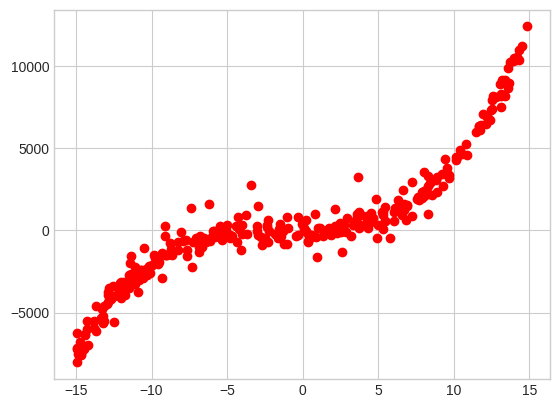

In [4]:
# Configuring different values of noise scale to off set the data.
noise_scale = [200,300,400,600,800,1000]
# For question 1 setting the number of samples to 50
number_of_samples = 50

#Generating data for different noise scales.
i=0
while i<len(noise_scale):
  x, y = generator(noise_scale[i], number_of_samples)
  # Plotting the generated data on a single graph.
  plt.style.use('seaborn-whitegrid')
  plt.plot(x,y,'ro')
  i+=1

We created a random dataset and set the parameters such as noise scale and the number of samples.
Noise Scale adds randomness to the data points and the number of outliers are high.
Number of Samples just consists of total number of data points in the dataset.

#### 2. Plot MSE versus order m, for m = 1,2,3,4,5,6,7,8,9 respectively. Identify the best choice of m.

In [5]:
# Configuring polynomial degrees to calculate Mean Squared Error.
poly_deg = [1,2,3,4,5,6,7,8]

mse_values = []
for order in poly_deg:
  # Using polyfit to calculate coefficients for each polynomial degree
  coefficients = np.polyfit(x.flatten(), y.flatten(), order)
  poly = np.poly1d(coefficients)
  y_pred = poly(x)
  # Calculating MSE for each degree
  mse = np.mean((y-y_pred)**2)
  mse_values.append(mse)


Text(0.5, 1.0, 'MSE vs Polynomial Degree')

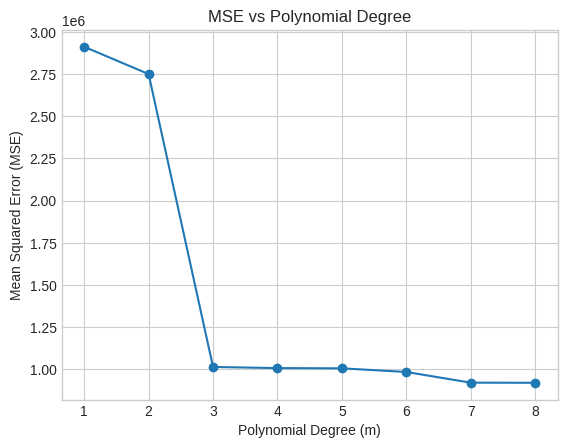

In [6]:
# Plotting MSE vs Polynomial Degree
plt.plot(poly_deg, mse_values, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Polynomial Degree')

We want to plot a function which goes through as many data points as possible. The function then predicts values which should be close to the original data points.
        y(x,w) = w0 + w1x + w2x^2 + ... + wm.x^m

We calculate the precision of the predicted data points using Mean Squared Error. The graph shows that the error drastically drop with high degree polynomial. Higher the polynomial, more will be the calculations and the model will be complex.


#### 3. Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm and plot the polynomials with the best m found in 2). Discuss the impact of noise scale to the accuracy of the returned parameters. [You need to plot a figure for EACH choice of noise_scale.]

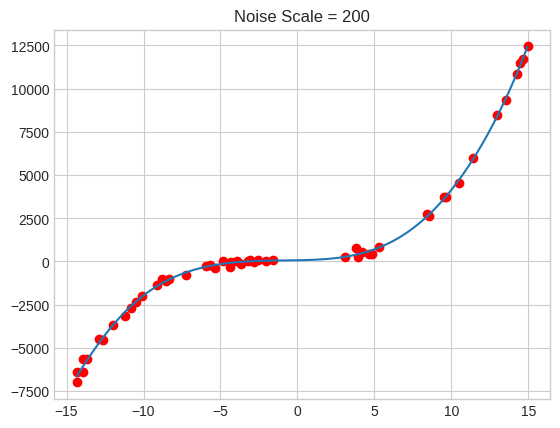

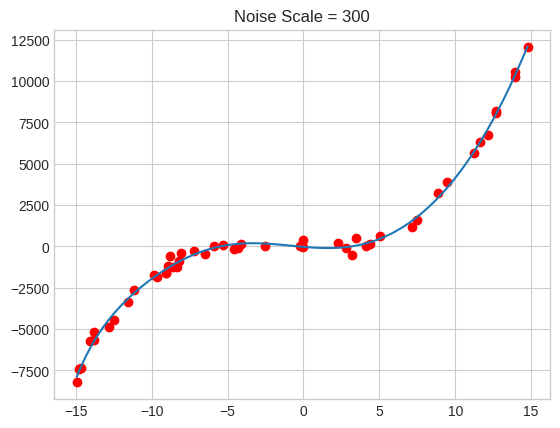

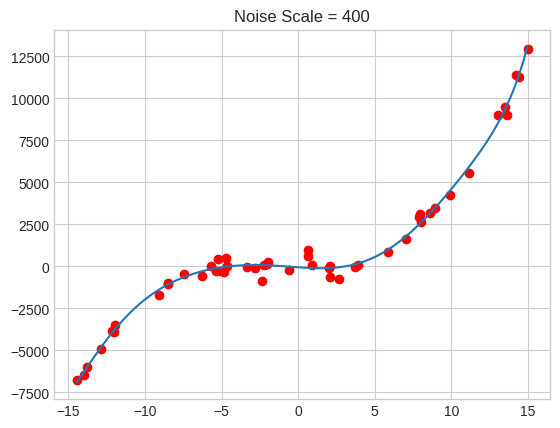

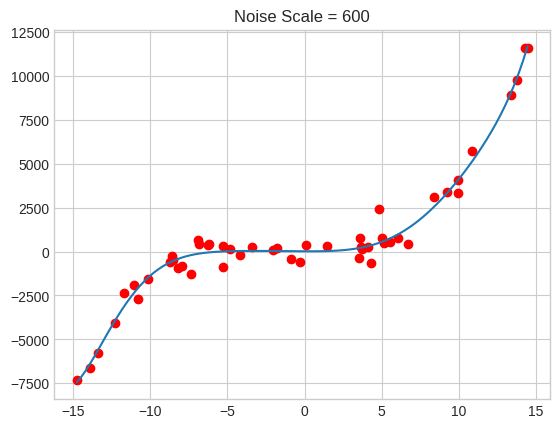

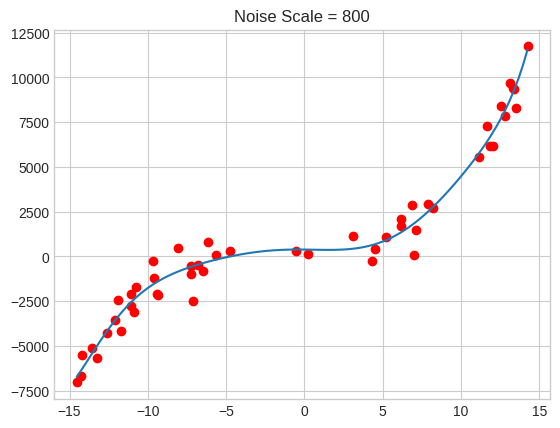

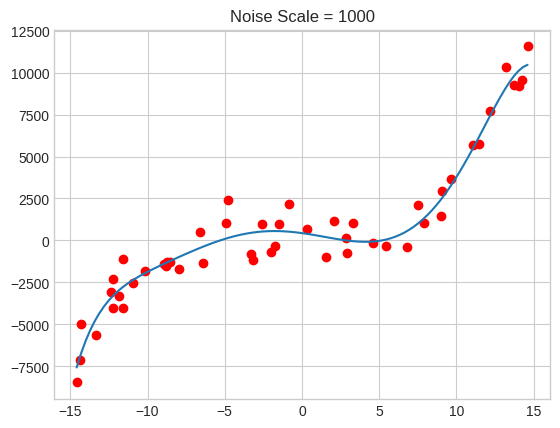

In [39]:
# Initializing list to store best values of m.
best_m = []
noise_scale = [200,300,400,600,800,1000]
number_of_samples = 50
# Regenerating random data while using noise scale and the number of samples
for i in range(len(noise_scale)):
  x, y = generator(noise_scale[i], number_of_samples)

  # Calculating MSE for each order
  mse_values = []
  for order in poly_deg:
    coefficients = np.polyfit(x.flatten(), y.flatten(), order)
    poly = np.poly1d(coefficients)
    y_pred = poly(x)
    mse = np.mean((y-y_pred)**2)
    mse_values.append(mse)


  # Finding best value of m
  m = poly_deg[np.argmin(mse_values)]
  best_m.append(m)

  # Plotting polynomials with best value of m
  plt.plot(x,y,'ro')
  # Using polyfit to calculate coefficients for each polynomial degree using the best values of m
  coefficients = np.polyfit(x.flatten(), y.flatten(), m)
  poly = np.poly1d(coefficients)
  # Calculating functions using the best values of m
  x_range = np.linspace(min(x), max(x), 100)
  y_range = poly(x_range)
  # Plotting the function against the noisy data using the best
  plt.title("Noise Scale = %d"%(noise_scale[i]))
  plt.plot(x_range, y_range, label=f'Order {best_m}')
  plt.show()



If we keep the number of samples same throughout but add noise to the data we can see that even with the best polynomial degree, the model is starts having difficulties while fitting and the precision drops as the noise increases.

Although the line seems to be smooth with maximum noise, there are a lot of outliers which will eventually increase the MSE.


#### 4. Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot the polynomials with the best m found in 2). Discuss the impact of the number of samples to the accuracy of the returned parameters. [You need to plot a figure for EACH choice of number_of_samples.]

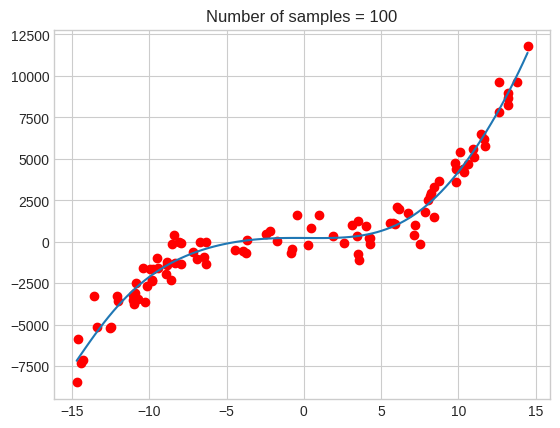

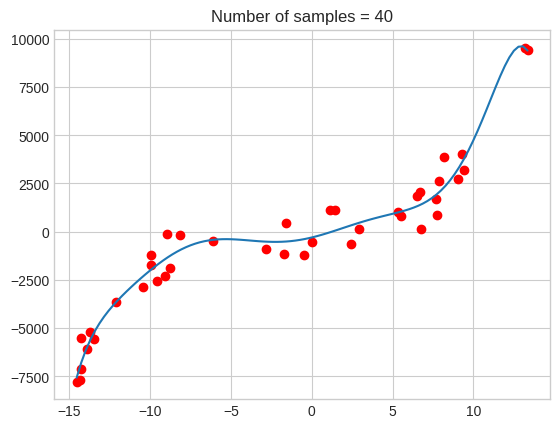

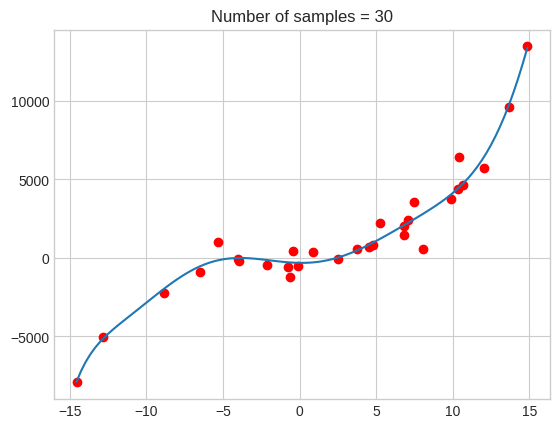

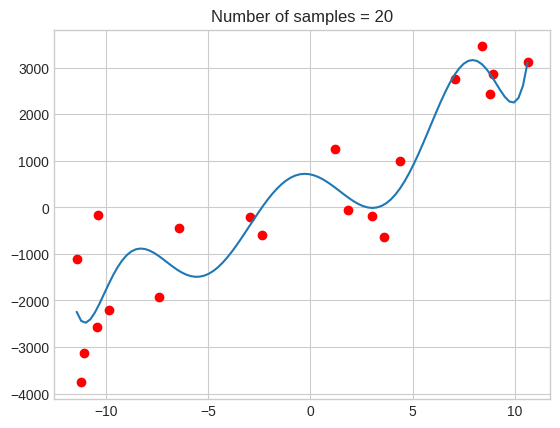

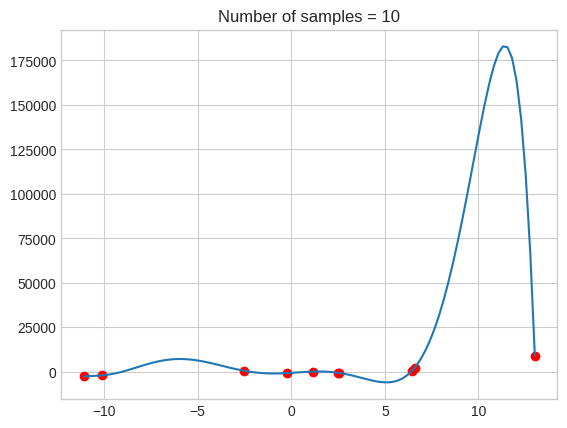

In [42]:
# Initializing list to store best values of m.
best_m = []
noise_scale = 800
number_of_samples = [100,40,30,20,10]
# Regenerating random data while using noise scale and the number of samples
for i in range(len(number_of_samples)):
  x, y = generator(noise_scale, number_of_samples[i])

  # Calculating MSE for each order
  mse_values = []
  for order in poly_deg:
    coefficients = np.polyfit(x.flatten(), y.flatten(), order)
    poly = np.poly1d(coefficients)
    y_pred = poly(x)
    mse = np.mean((y-y_pred)**2)
    mse_values.append(mse)


  # Finding best value of m
  m = poly_deg[np.argmin(mse_values)]
  best_m.append(m)

  # Plotting polynomials with best value of m
  plt.plot(x,y,'ro')
  # Using polyfit to calculate coefficients for each polynomial degree using the best values of m
  coefficients = np.polyfit(x.flatten(), y.flatten(), m)
  poly = np.poly1d(coefficients)
  # Calculating functions using the best values of m
  x_range = np.linspace(min(x), max(x), 100)
  y_range = poly(x_range)
  # Plotting the function against the noisy data using the best
  plt.title("Number of samples = %d"%(number_of_samples[i]))
  plt.plot(x_range, y_range, label=f'Order {best_m}')
  plt.show()


If we keep the noise scale constant but change the number of samples, we have a different observation.

As the number of samples drops, the model becomes too complex for low sized data. This results in overfitting. The model tries too hard to predict data points based on the training data. Eventually this will cause lower precision scores while validating on unseen data.

The best way to solve this issue is to increase the number of samples to afford a more complex model. That way the model has enough training data to predict later on any unseen data.
